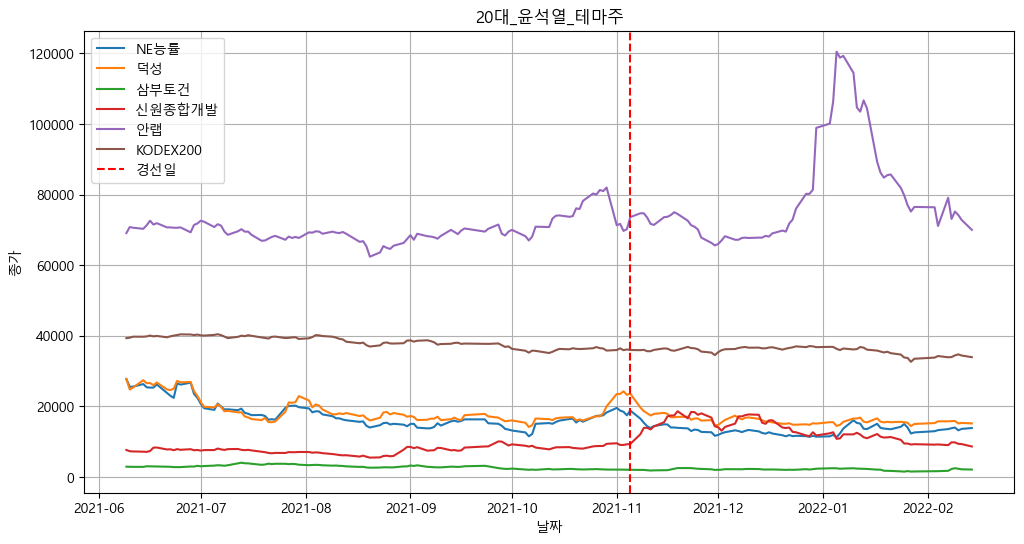

In [5]:
import FinanceDataReader as fdr
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import matplotlib as mpl
import matplotlib.dates as mdates
warnings.filterwarnings('ignore')
mpl.rc('font', family='Malgun Gothic')  
mpl.rcParams['axes.unicode_minus'] = False

start_date = '2021-06-09' #경선확정일 - 10
end_date = '2022-02-14' #경선확정일 + 10

thema1 = fdr.DataReader('053290', start=start_date, end=end_date) #테마주1
thema2 = fdr.DataReader('004830', start=start_date, end=end_date)
thema3 = fdr.DataReader('001470', start=start_date, end=end_date)
thema4 = fdr.DataReader('017000', start=start_date, end=end_date)
thema5 = fdr.DataReader('053800', start=start_date, end=end_date)
thema6 = fdr.DataReader('069500', start=start_date, end=end_date)#테마주2  테마를 추가하고싶으면 아래에 이어서 적으시면됩니다.# thema2 = fdr.DataReader('015260', start=start_date, end=end_date) 
#(1) 이 밑으로 계속 추가한 후 plt 부분에 같이 추가하시면 같이 시각화 가능

thema= pd.DataFrame()

thema['thema1'] = thema1['Close']
thema['thema2'] = thema2['Close']
thema['thema3'] = thema3['Close']
thema['thema4'] = thema4['Close']
thema['thema5'] = thema5['Close']
thema['thema6'] = thema6['Close']
#(1)에 추가했을 경우 이 부분도 추가해주세요


plt.figure(figsize=(12, 6))
plt.plot(thema.index, thema['thema1'], label='NE능률')
plt.plot(thema.index, thema['thema2'], label='덕성')
plt.plot(thema.index, thema['thema3'], label='삼부토건')
plt.plot(thema.index, thema['thema4'], label='신원종합개발')
plt.plot(thema.index, thema['thema5'], label='안랩')
plt.plot(thema.index, thema['thema6'], label='KODEX200')

#(1)에 추가했을 경우 이 부분도 추가해주세요

#경선 일에 빨간 점선 줄
plt.axvline(x=pd.to_datetime('2021-11-05'), color='red', linestyle='--', label='경선일') #경선일을 수정하려면 datatime변수 수정해주시면 됩니다.

plt.xlabel('날짜')
plt.ylabel('종가')
plt.title('20대_윤석열_테마주')
plt.legend()
plt.grid(True)
plt.show()

label_dict = {
    'thema1': 'NE능률',
    'thema2': '덕성',
    'thema3': '삼부토건',
    'thema4': '신원종합개발',
    'thema5' : '안랩',
    'thema6' : 'KODEX200'
}

# 열 이름을 종목명으로 교체
thema_renamed = thema.rename(columns=label_dict)

# CSV로 저장 (index에 날짜 포함됨)
thema_renamed.to_csv('20대_윤석열_테마주_일별종가_단기.csv', encoding='utf-8-sig')

=== CAR (누적 비정상수익률) ===
신원종합개발    0.385605
덕성       -0.075894
삼부토건     -0.080229
안랩       -0.110973
NE능률     -0.209364
dtype: float64


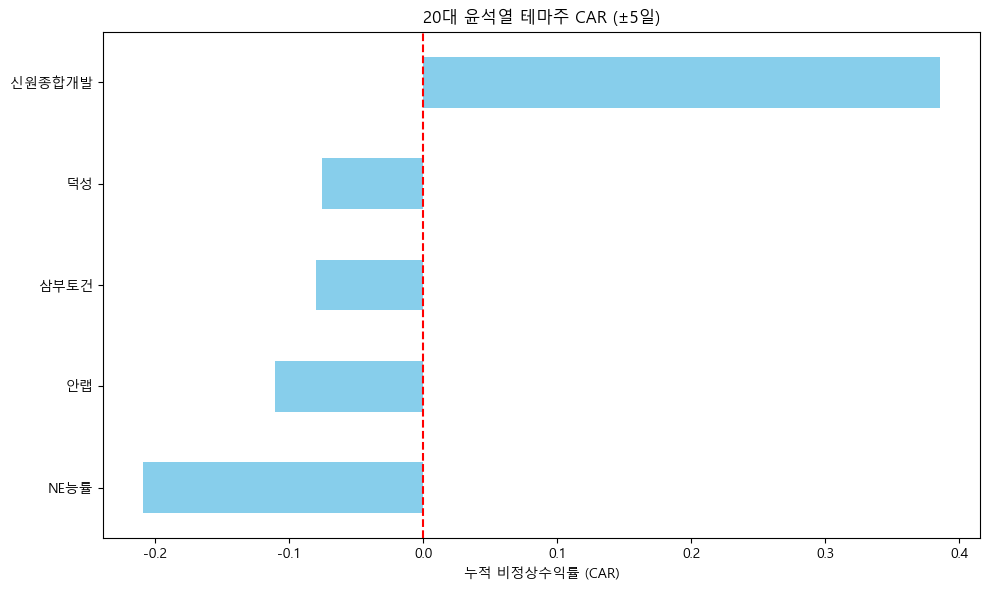

In [8]:
import FinanceDataReader as fdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib as mpl
import warnings

warnings.filterwarnings('ignore')
mpl.rc('font', family='Malgun Gothic')  
mpl.rcParams['axes.unicode_minus'] = False

# 날짜 설정
start_date = '2021-06-09'
end_date = '2022-02-14'
event_date = '2021-11-05'  # 경선 확정일

# 분석 대상 종목 및 시장수익률 (KODEX200)
tickers = {
    'NE능률': '053290',
    '덕성': '004830',
    '삼부토건': '001470',
    '신원종합개발': '017000',
    '안랩': '053800',
    'KODEX200': '069500'
}

# 데이터 수집 및 종가 정리
df = pd.DataFrame()
for name, code in tickers.items():
    df[name] = fdr.DataReader(code, start=start_date, end=end_date)['Close']

# 일간 로그수익률 계산
log_returns = np.log(df / df.shift(1)).dropna()

# 회귀분석: 테마주 별로 KODEX200 수익률에 대한 회귀를 통한 예측수익률 추정
market_return = log_returns['KODEX200']
abnormal_returns = pd.DataFrame(index=log_returns.index)

for name in tickers:
    if name == 'KODEX200':
        continue
    y = log_returns[name]
    x = sm.add_constant(market_return)
    model = sm.OLS(y, x).fit()
    expected = model.predict(x)
    abnormal = y - expected
    abnormal_returns[name] = abnormal

# CAR 계산 구간 (예: 경선일 기준 ±5일)
event_dt = pd.to_datetime(event_date)
window = 5
car_window = abnormal_returns.loc[(abnormal_returns.index >= event_dt - pd.Timedelta(days=window)) &
                                  (abnormal_returns.index <= event_dt + pd.Timedelta(days=window))]

# 누적 비정상수익률 계산 (CAR)
car = car_window.sum()

print("=== CAR (누적 비정상수익률) ===")
print(car.sort_values(ascending=False))

# 시각화
plt.figure(figsize=(10, 6))
car.sort_values().plot(kind='barh', color='skyblue')
plt.axvline(x=0, color='red', linestyle='--')
plt.title("20대 윤석열 테마주 CAR (±5일)")
plt.xlabel("누적 비정상수익률 (CAR)")
plt.tight_layout()
plt.show()


=== 20대 대선 윤석열 테마주 CAR (±5일, %) ===
신원종합개발    38.560450
덕성        -7.589385
삼부토건      -8.022875
안랩       -11.097318
NE능률     -20.936416
dtype: float64


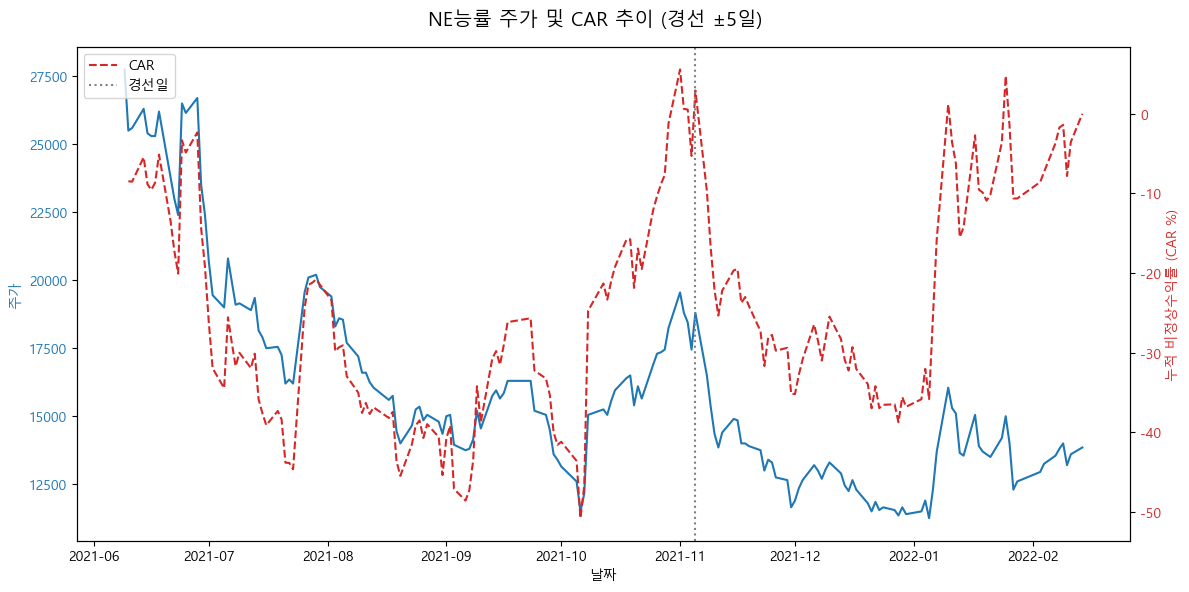

In [21]:
import FinanceDataReader as fdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
import matplotlib as mpl

warnings.filterwarnings('ignore')
mpl.rc('font', family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False

# 분석 대상 및 기간 설정
start_date = '2021-06-09'
end_date = '2022-02-14'
event_date = '2021-11-05'
event_dt = pd.to_datetime(event_date)
window = 5  # CAR 계산 구간: ±5일

# 테마주 + 시장지수 (KODEX200)
tickers = {
    'NE능률': '053290',
    '덕성': '004830',
    '삼부토건': '001470',
    '신원종합개발': '017000',
    '안랩': '053800',
    'KODEX200': '069500'
}

# 종가 수집
df = pd.DataFrame()
for name, code in tickers.items():
    df[name] = fdr.DataReader(code, start=start_date, end=end_date)['Close']

# 수익률 계산 (로그 수익률)
log_returns = np.log(df / df.shift(1)).dropna()
market_return = log_returns['KODEX200']

# 비정상수익률 저장용 DataFrame
abnormal_returns = pd.DataFrame(index=log_returns.index)

# 각 종목에 대해 회귀모형으로 기대수익률 추정 → 비정상수익률 계산
for name in tickers:
    if name == 'KODEX200':
        continue
    y = log_returns[name]
    x = sm.add_constant(market_return)
    model = sm.OLS(y, x).fit()
    expected = model.predict(x)
    abnormal = y - expected
    abnormal_returns[name] = abnormal

# CAR 계산 기간: 이벤트일 ±5일
car_window = abnormal_returns.loc[(abnormal_returns.index >= event_dt - pd.Timedelta(days=window)) &
                                  (abnormal_returns.index <= event_dt + pd.Timedelta(days=window))]

# CAR 계산 (누적 비정상수익률)
car = car_window.sum() * 100  # 퍼센트로 보기 위해 100 곱함

print("=== 20대 대선 윤석열 테마주 CAR (±5일, %) ===")
print(car.sort_values(ascending=False))

# ▒▒▒ 시각화 ▒▒▒
# 각 종목의 주가와 CAR 시계열을 함께 보여주는 그래프 (예: NE능률)
target_stock = 'NE능률'

fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('날짜')
ax1.set_ylabel('주가', color=color)
ax1.plot(df[target_stock], color=color, label='주가')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('누적 비정상수익률 (CAR %)', color=color)
ax2.plot(abnormal_returns[target_stock].cumsum() * 100, color=color, linestyle='--', label='CAR')
ax2.tick_params(axis='y', labelcolor=color)

plt.axvline(event_dt, color='gray', linestyle=':', label='경선일')
fig.suptitle(f"{target_stock} 주가 및 CAR 추이 (경선 ±5일)", fontsize=14)
fig.tight_layout()
plt.legend(loc='upper left')
plt.show()


=== 구간별 CAR 분석 결과 (단위: %) ===
            NE능률         덕성      삼부토건     신원종합개발         안랩
-5~-1  -4.090166  15.231634 -2.881707  -3.518548 -16.138559
0       8.217363   2.205359 -0.803971   1.300014   4.881094
0~1     8.217363   2.205359 -0.803971   1.300014   4.881094
0~2     8.217363   2.205359 -0.803971   1.300014   4.881094
0~5   -16.846250 -22.821019 -5.141168  42.078999   5.041241


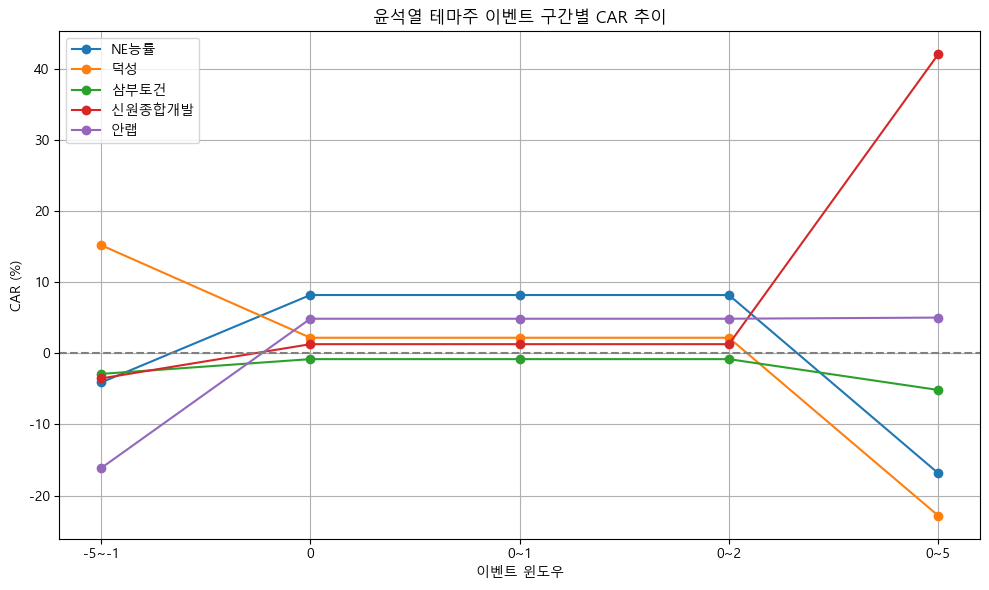

In [16]:
import FinanceDataReader as fdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib as mpl
import warnings

warnings.filterwarnings('ignore')
mpl.rc('font', family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False

# 기본 설정
start_date = '2021-06-09'
end_date = '2022-02-14'
event_date = '2021-11-05'
event_dt = pd.to_datetime(event_date)

# 분석 대상 종목 (윤석열 테마주 + 시장수익률)
tickers = {
    'NE능률': '053290',
    '덕성': '004830',
    '삼부토건': '001470',
    '신원종합개발': '017000',
    '안랩': '053800',
    'KODEX200': '069500'
}

# 데이터 수집 (종가)
df = pd.DataFrame()
for name, code in tickers.items():
    df[name] = fdr.DataReader(code, start=start_date, end=end_date)['Close']

# 로그 수익률 계산
log_returns = np.log(df / df.shift(1)).dropna()
market_return = log_returns['KODEX200']

# 비정상수익률 계산
abnormal_returns = pd.DataFrame(index=log_returns.index)

for name in tickers:
    if name == 'KODEX200':
        continue
    y = log_returns[name]
    x = sm.add_constant(market_return)
    model = sm.OLS(y, x).fit()
    expected = model.predict(x)
    abnormal = y - expected
    abnormal_returns[name] = abnormal

# 분석할 이벤트 윈도우 설정 (캡처 참조)
event_windows = {
    '-5~-1': (-5, -1),
    '0': (0, 0),
    '0~1': (0, 1),
    '0~2': (0, 2),
    '0~5': (0, 5)
}

# 각 구간별 CAR 저장용
car_results = pd.DataFrame()

for label, (start_offset, end_offset) in event_windows.items():
    mask = (abnormal_returns.index >= event_dt + pd.Timedelta(days=start_offset)) & \
           (abnormal_returns.index <= event_dt + pd.Timedelta(days=end_offset))
    car = abnormal_returns.loc[mask].sum() * 100  # %
    car_results[label] = car

car_results = car_results.T  # transpose for table format

# 결과 출력
print("=== 구간별 CAR 분석 결과 (단위: %) ===")
print(car_results)

# CSV 저장
car_results.to_csv('윤석열_테마주_CAR_구간분석.csv', encoding='utf-8-sig')

# ▒▒▒ 시각화 ▒▒▒
# 꺾은선 그래프: 각 종목의 CAR 추이
plt.figure(figsize=(10, 6))
for stock in car_results.columns:
    plt.plot(car_results.index, car_results[stock], marker='o', label=stock)

plt.axhline(0, color='gray', linestyle='--')
plt.title("윤석열 테마주 이벤트 구간별 CAR 추이")
plt.xlabel("이벤트 윈도우")
plt.ylabel("CAR (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


=== t 기준 누적 CAR (%) ===
         NE능률         덕성      삼부토건     신원종합개발         안랩
-5        NaN        NaN       NaN        NaN        NaN
-4    6.64575  15.897564  -0.33886   0.891789  -14.21311
-3   1.341418   14.55429 -2.002839   -6.42212 -14.358336
-2   1.580794  19.732689 -1.333355  -4.374372 -16.454343
-1  -4.409458  15.116593 -3.096826  -3.327501 -16.045094
0    3.883884  17.418193 -3.924692  -1.912825 -11.105285
1         NaN        NaN       NaN        NaN        NaN
2         NaN        NaN       NaN        NaN        NaN
3   -8.703132  -0.456144 -4.203588  24.267559  -9.566825
4  -15.951999  -5.705491  -6.05252  37.599682  -9.711288
5  -21.033443  -7.384973 -8.349234  39.175086 -10.787517


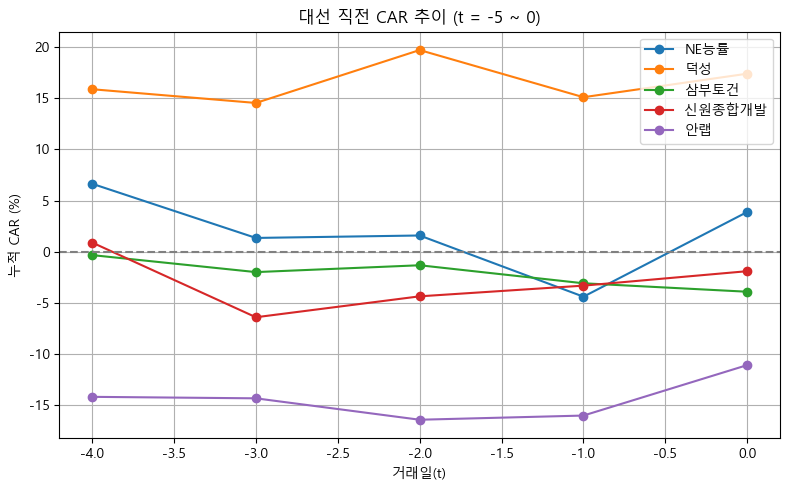

<module 'matplotlib.pyplot' from 'C:\\Users\\AHN\\AppData\\Local\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

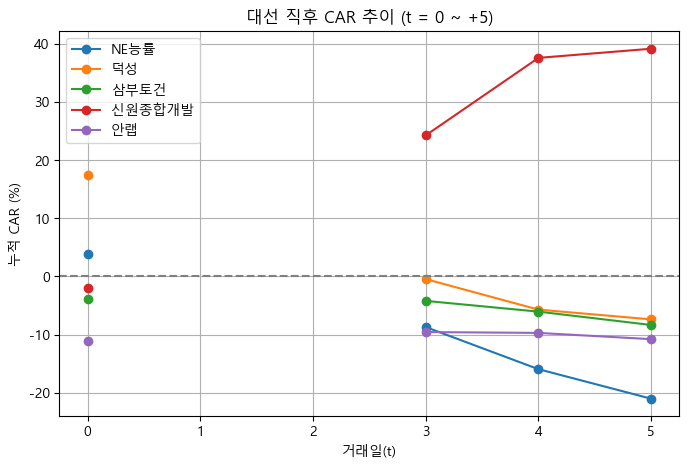

In [13]:
import FinanceDataReader as fdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib as mpl
import warnings

warnings.filterwarnings('ignore')
mpl.rc('font', family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False

# 분석 설정
start_date = '2021-06-01'
end_date = '2022-02-28'
event_date = '2021-11-05'
event_dt = pd.to_datetime(event_date)

# 테마주 + 시장수익률 종목코드
tickers = {
    'NE능률': '053290',
    '덕성': '004830',
    '삼부토건': '001470',
    '신원종합개발': '017000',
    '안랩': '053800',
    'KODEX200': '069500'
}

# 종가 수집
df = pd.DataFrame()
for name, code in tickers.items():
    df[name] = fdr.DataReader(code, start=start_date, end=end_date)['Close']

# 로그 수익률 계산
log_returns = np.log(df / df.shift(1)).dropna()
market_return = log_returns['KODEX200']

# 비정상수익률 계산
abnormal_returns = pd.DataFrame(index=log_returns.index)
for name in tickers:
    if name == 'KODEX200':
        continue
    y = log_returns[name]
    x = sm.add_constant(market_return)
    model = sm.OLS(y, x).fit()
    expected = model.predict(x)
    abnormal = y - expected
    abnormal_returns[name] = abnormal

# 분석 구간: t = -5 ~ +5
window_range = range(-5, 6)
stock_list = [name for name in tickers if name != 'KODEX200']
car_time_series = pd.DataFrame(index=window_range, columns=stock_list)

# 각 t일의 비정상수익률 수집
for t in window_range:
    date = event_dt + pd.Timedelta(days=t)
    if date in abnormal_returns.index:
        car_time_series.loc[t] = abnormal_returns.loc[date][stock_list].values * 100
    else:
        car_time_series.loc[t] = np.nan

# 누적 CAR 계산
car_cumulative = car_time_series.cumsum()

# 결과 출력
print("=== t 기준 누적 CAR (%) ===")
print(car_cumulative)

# CSV 저장
car_cumulative.to_csv('윤석열_테마주_CAR_t별.csv', encoding='utf-8-sig')

# 시각화 1: 대선 직전 CAR 추이 (t = -5 ~ 0)
pre_election = car_cumulative.loc[-5:0].sort_index()
plt.figure(figsize=(8, 5))
for col in pre_election.columns:
    plt.plot(pre_election.index.astype(int), pre_election[col], marker='o', label=col)
plt.axhline(0, color='gray', linestyle='--')
plt.title('대선 직전 CAR 추이 (t = -5 ~ 0)')
plt.xlabel('거래일(t)')
plt.ylabel('누적 CAR (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 시각화 2: 대선 직후 CAR 추이 (t = 0 ~ +5)
post_election = car_cumulative.loc[0:5].sort_index()
plt.figure(figsize=(8, 5))
for col in post_election.columns:
    plt.plot(post_election.index.astype(int), post_election[col], marker='o', label=col)
plt.axhline(0, color='gray', linestyle='--')
plt.title('대선 직후 CAR 추이 (t = 0 ~ +5)')
plt.xlabel('거래일(t)')
plt.ylabel('누적 CAR (%)')
plt.grid(True)
plt.legend()
plt


=== 선거 직전 t별 CAR 누적 평균 ===
       전체 평균  상위 25% 평균  하위 25% 평균
-5       NaN        NaN        NaN
-4  1.820306  15.964817 -14.225591
-3 -1.174082  14.864485 -14.333614
-2 -0.158715  19.752768 -16.543163
-1 -2.279469  15.231634 -16.138559
0   0.880503  17.436993 -11.257465


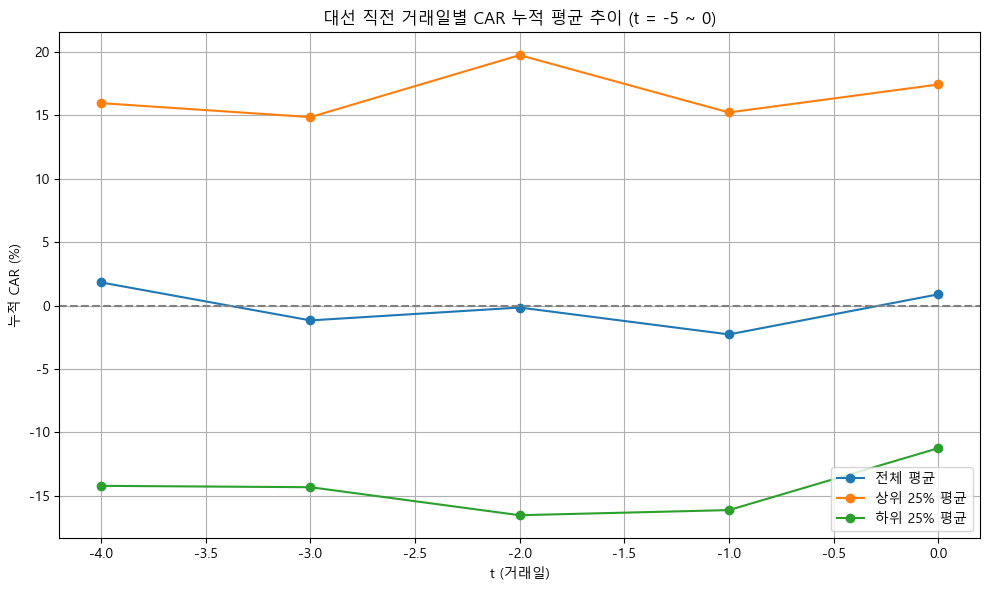

In [22]:
import FinanceDataReader as fdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
import matplotlib as mpl

warnings.filterwarnings('ignore')
mpl.rc('font', family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False

# 설정
start_date = '2021-06-09'
end_date = '2022-02-14'
event_date = '2021-11-05'
event_dt = pd.to_datetime(event_date)

tickers = {
    'NE능률': '053290',
    '덕성': '004830',
    '삼부토건': '001470',
    '신원종합개발': '017000',
    '안랩': '053800',
    'KODEX200': '069500'
}

# 데이터 수집
df = pd.DataFrame()
for name, code in tickers.items():
    df[name] = fdr.DataReader(code, start=start_date, end=end_date)['Close']

# 수익률 계산
log_returns = np.log(df / df.shift(1)).dropna()
market_return = log_returns['KODEX200']

# 비정상수익률 계산
abnormal_returns = pd.DataFrame(index=log_returns.index)
for name in tickers:
    if name != 'KODEX200':
        y = log_returns[name]
        x = sm.add_constant(market_return)
        model = sm.OLS(y, x).fit()
        expected = model.predict(x)
        abnormal_returns[name] = y - expected

# 대선 직전 t = -5 ~ 0 거래일별 CAR 누적 시계열 계산
window_range = range(-5, 1)
stock_list = [name for name in tickers if name != 'KODEX200']
car_time_series = pd.DataFrame(index=window_range, columns=stock_list)

for t in window_range:
    date = event_dt + pd.Timedelta(days=t)
    if date in abnormal_returns.index:
        car_time_series.loc[t] = abnormal_returns.loc[date][stock_list].values * 100
    else:
        car_time_series.loc[t] = np.nan

# 누적 CAR 계산 (t=-5부터 누적합)
car_cumulative = car_time_series.cumsum()

# ✅ t별 평균 CAR (전체 평균, 상위 25%, 하위 25%)
summary_df = pd.DataFrame(index=car_cumulative.index)
summary_df['전체 평균'] = car_cumulative.mean(axis=1)

# 상위 25% 종목 평균
top_25 = car_cumulative.iloc[-1].sort_values(ascending=False).iloc[:len(stock_list)//4].index
summary_df['상위 25% 평균'] = car_cumulative[top_25].mean(axis=1)

# 하위 25% 종목 평균
bottom_25 = car_cumulative.iloc[-1].sort_values(ascending=True).iloc[:len(stock_list)//4].index
summary_df['하위 25% 평균'] = car_cumulative[bottom_25].mean(axis=1)

# 결과 출력
print("=== 선거 직전 t별 CAR 누적 평균 ===")
print(summary_df)

# ▒▒▒ 시각화 ▒▒▒
plt.figure(figsize=(10, 6))
for col in summary_df.columns:
    plt.plot(summary_df.index, summary_df[col], marker='o', label=col)

plt.axhline(0, color='gray', linestyle='--')
plt.title("대선 직전 거래일별 CAR 누적 평균 추이 (t = -5 ~ 0)")
plt.xlabel("t (거래일)")
plt.ylabel("누적 CAR (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
